# Assignment_3: Decision Tree Regressor

In [1]:
# Problem statement

# To predict the revenue of an ice-cream shop using decision tree regression, based on temperature for 500 days. 

In [2]:
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
## Importing dataset

df=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\IceCreamData.csv")

In [4]:
##Pre-viewing first few rows of data

df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
## Target(dependent)    : Revenue
## Feature(Independent) : Temperature

In [6]:
## Checking for missing values

df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [7]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<AxesSubplot:xlabel='Temperature'>

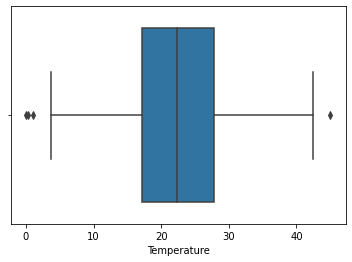

In [8]:
## Box-plot for Temperature

sns.boxplot(data=df,x='Temperature')

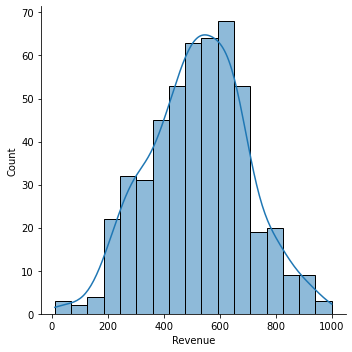

In [9]:
## Distribution plot for Revenue

sns.displot(df['Revenue'],kde=True)

In [10]:
## We can say that Revenue is Normally distributed.

In [11]:
## Finding Correlation between target and feature

df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [12]:
## Almost perfect positive correlation between feature and target => Revenue increases with rise in temperature.

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

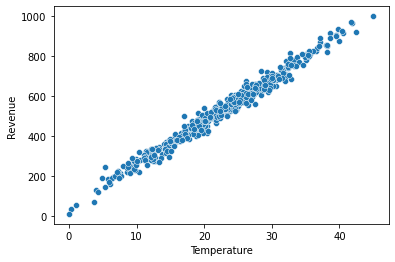

In [13]:
## Visualising relation between temperature and Revenue

sns.scatterplot(data=df,x="Temperature",y="Revenue")

In [14]:
## Splitting data in train and test set

x=pd.DataFrame(df['Temperature'])
y=pd.DataFrame(df['Revenue'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=1)

In [15]:
print("x train dim:",x_train.shape)
print("y train dim:",y_train.shape)
print("x test dim:",x_test.shape)
print("y test dim:",y_test.shape)

x train dim: (375, 1)
y train dim: (375, 1)
x test dim: (125, 1)
y test dim: (125, 1)


In [16]:
## Applying Random Forest Regressor 

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)


In [17]:
## Random state facilitates reproducibility.

In [18]:
## Evaluation metrics

dtr.fit(x_train,y_train)
print("r^2:",dtr.score(x_test,y_test),"\n")

from sklearn.metrics import mean_squared_error
print("rmse on train data:",np.sqrt(mean_squared_error(y_train,dtr.predict(x_train))),"\n")
print("rmse on test data:",np.sqrt(mean_squared_error(y_test,dtr.predict(x_test))))

r^2: 0.9619098433390264 

rmse on train data: 0.0 

rmse on test data: 35.170914188114374


In [ ]:
## There is error of 35.17 units in predicting the value of Revenue for unseen data.

In [19]:
## Predicting Revenue values for test dataset

y_est=dtr.predict(x_test)